<a href="https://colab.research.google.com/github/CsCs1984/Projects-/blob/main/Airbnb_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving listings.csv to listings.csv


In [ ]:
#Import packages to be used
import numpy as np
import pandas as pd
import re
import nltk
import spacy
import string
pd.options.mode.chained_assignment = None
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
matplotlib.style.use('ggplot')
%matplotlib inline

#Load in the data and tell me something about it
listings_data1 = pd.read_csv('listings (1).csv', header = 0)

In [ ]:
listings_data1.info()
listings_data1[:5]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66334 entries, 0 to 66333
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            66334 non-null  int64  
 1   listing_url                                   66334 non-null  object 
 2   scrape_id                                     66334 non-null  int64  
 3   last_scraped                                  66334 non-null  object 
 4   name                                          66270 non-null  object 
 5   description                                   64989 non-null  object 
 6   neighborhood_overview                         40213 non-null  object 
 7   picture_url                                   66333 non-null  object 
 8   host_id                                       66334 non-null  int64  
 9   host_url                                      66334 non-null 

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2577,https://www.airbnb.com/rooms/2577,20201012032825,2020-10-19,Loft for 4 by Canal Saint Martin,"100 m2 loft (1100 sq feet) with high ceiling, ...",NaN,https://a0.muscache.com/pictures/09da057c-0120...,2827,https://www.airbnb.com/users/show/2827,Karine,2008-09-09,"Casablanca, Grand Casablanca, Morocco","Arrivée à Casablanca il y a 4 ans, je suis amo...",a few days or more,0%,67%,f,https://a0.muscache.com/im/pictures/user/17fe6...,https://a0.muscache.com/im/pictures/user/17fe6...,République,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,NaN,Entrepôt,NaN,48.86993,2.36251,Entire loft,Entire home/apt,4,NaN,2 baths,2.0,2.0,"[""Hangers"", ""Iron"", ""Laptop-friendly workspace...",$125.00,3,1125,3.0,3.0,1125.0,1125.0,3.0,1125.0,NaN,t,0,17,47,321,2020-10-19,1,0,0,2019-01-02,2019-01-02,100.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,t,1,1,0,0,0.05
1,3109,https://www.airbnb.com/rooms/3109,20201012032825,2020-10-18,zen and calm,<b>The space</b><br />I bedroom appartment in ...,Good restaurants<br />very close the Montparna...,https://a0.muscache.com/pictures/baeae9e2-cd53...,3631,https://www.airbnb.com/users/show/3631,Anne,2008-10-14,"Paris, Île-de-France, France",NaN,within a day,100%,0%,f,https://a0.muscache.com/im/users/3631/profile_...,https://a0.muscache.com/im/users/3631/profile_...,Alésia,1.0,1.0,"['email', 'phone', 'facebook', 'reviews']",t,f,"Paris, Île-de-France, France",Observatoire,NaN,48.83349,2.31852,Entire apartment,Entire home/apt,2,NaN,1 bath,NaN,1.0,"[""Smart lock"", ""Luggage dropoff allowed"", ""Lap...",$60.00,2,30,2.0,2.0,30.0,30.0,2.0,30.0,NaN,t,30,60,90,365,2020-10-18,9,1,0,2016-12-27,2019-10-24,100.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,f,1,1,0,0,0.19
2,4886,https://www.airbnb.com/rooms/4886,20201012032825,2020-10-18,Country-Style Studio Hip Area FREE CRUISE & WIFI,Bright and Cozy Studio Apartment for 2 Guests...,2 Free River Cruise Tix with your booking ! M...,https://a0.muscache.com/pictures/395578/e7f46d...,6792,https://www.airbnb.com/users/show/6792,Ryan Of Cobblestone,2009-01-16,"Paris, Île-de-France, France",I am the owner of Cobblestone Paris Rentals\r\...,within a few hours,100%,100%,f,https://a0.muscache.com/im/users/6792/profile_...,https://a0.muscache.com/im/users/6792/profile_...,République,9.0,9.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,"Paris, Ile-de-France, France",Popincourt,NaN,48.86528,2.37115,Entire apartment,Entire home/apt,2,NaN,1 bath,NaN,2.0,"[""Cable TV"", ""Laptop-friendly workspace"", ""Hai...",$89.00,3,120,3.0,3.0,1125.0,1125.0,3.0,1125.0,NaN,t,0,0,0,0,2020-10-18,25,0,0,2009-09-05,2019-05-06,90.0,9.0,10.0,9.0,9.0,10.0,9.0,7511101570436,f,11,11,0,0,0.18
3,4890,https://ww

In [ ]:
listings_data1.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,6.633400e+04,6.633400e+04,6.633400e+04,66314.000000,66314.000000,0.0,66334.000000,66334.000000,66334.000000,0.0,52673.000000,65777.000000,66334.000000,6.633400e+04,66322.000000,66322.000000,6.632200e+04,6.632200e+04,66322.000000,6.632200e+04,0.0,66334.000000,66334.000000,66334.000000,66334.000000,66334.000000,66334.000000,66334.00000,50042.000000,49993.000000,50003.000000,49976.000000,49996.000000,49976.000000,49976.000000,66334.000000,66334.000000,66334.000000,66334.000000,51269.000000
mean,2.378600e+07,2.020101e+13,8.588048e+07,12.150918,12.150918,NaN,48.864217,2.345347,3.051180,NaN,1.371803,1.677076,5.552206,8.499396e+02,5.476086,6.430943,9.803462e+04,9.806116e+04,6.039025,9.804126e+04,NaN,7.601411,16.306977,25.948729,93.557572,19.131411,3.177586,0.16836,93.009992,9.594703,9.204008,9.676365,9.711637,9.682287,9.269970,8.092532,7.677888,0.247837,0.021347,0.755153
std,1.389727e+07,2.989085e+01,1.019247e+08,72.217125,72.217125,NaN,0.018397,0.033419,1.588011,NaN,0.949021,1.298118,44.328230,3.883143e+04,44.267508,47.424822,1.444297e+07,1.444297e+07,46.855043,1.444297e+07,NaN,11.680212,24.255866,36.523816,134.524627,40.979420,8.358468,0.96560,8.859026,0.835146,1.103281,0.775920,0.755361,0.696642,0.941039,34.964996,34.993198,1.073846,0.351504,1.061548
min,2.577000e+03,2.020101e+13,2.626000e+03,0.000000,0.000000,NaN,48.812170,2.219870,0.000000,NaN,1.000000,0.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.174930e+07,2.020101e+13,1.255802e+07,1.000000,1.000000,NaN,48.850880,2.324143,2.000000,NaN,1.000000,1.000000,1.000000,3.000000e+01,1.000000,2.000000,3.000000e+01,4.500000e+01,2.000000,3.752500e+01,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,90.000000,9.000000,9.000000,10.000000,10.000000,10.000000,9.000000,1.000000,1.000000,0.000000,0.000000,0.140000
50%,2.366572e+07,2.020101e+13,3.704873e+07,1.000000,1.000000,NaN,48.865460,2.348260,2.000000,NaN,1.000000,1.000000,2.000000,1.125000e+03,2.000000,3.000000,1.125000e+03,1.125000e+03,2.800000,1.125000e+03,NaN,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.00000,95.000000,10.000000,9.000000,10.000000,10.000000,10.000000,9.000000,1.000000,1.000000,0.000000,0.000000,0.390000
75%,3.659292e+07,2.020101e+13,1.294565e+08,2.000000,2.000000,NaN,48.879250,2.370630,4.000000,NaN,2.000000,2.000000,4.000000,1.125000e+03,4.000000,4.000000,1.125000e+03,1.125000e+03,4.000000,1.125000e+03,NaN,16.000000,43.000000,67.000000,178.000000,19.000000,3.000000,0.00000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,1.000000,0.000000,0.000000,0.960000
max,4.582806e+07,2.020101e+13,3.713708e+08,1101.000000,1101.000000,NaN,48.905670,2.475060,16.000000,NaN,50.000000,90.000000,9999.000000,1.000000e+07,9999.000000,9999.000000,2.147484e+09,2.147484e+09,9999.000000,2.147484e+09,NaN,30.000000,60.000000,90.000000,365.000000,861.000000,565.000000,78.00000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,310.000000,31

In [ ]:
ld = listings_data1.loc[:,['name', 'description',
    'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
    'neighbourhood_group_cleansed', 'property_type', 'room_type',
    'accommodates', 'bathrooms', 'bedrooms', 'beds','amenities', 'price','minimum_nights',
    'maximum_nights', 'review_scores_rating', 'review_scores_accuracy',
    'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication',
    'review_scores_location', 'review_scores_value']]

In [ ]:
ld.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66334 entries, 0 to 66333
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          66270 non-null  object 
 1   description                   64989 non-null  object 
 2   host_response_time            27040 non-null  object 
 3   host_response_rate            27040 non-null  object 
 4   host_acceptance_rate          39960 non-null  object 
 5   host_is_superhost             66314 non-null  object 
 6   neighbourhood_group_cleansed  0 non-null      float64
 7   property_type                 66334 non-null  object 
 8   room_type                     66334 non-null  object 
 9   accommodates                  66334 non-null  int64  
 10  bathrooms                     0 non-null      float64
 11  bedrooms                      52673 non-null  float64
 12  beds                          65777 non-null  float64
 13  a

In [ ]:
listings_data1.isnull().sum()

id                                                  0
listing_url                                         0
scrape_id                                           0
last_scraped                                        0
name                                               64
                                                ...  
calculated_host_listings_count                      0
calculated_host_listings_count_entire_homes         0
calculated_host_listings_count_private_rooms        0
calculated_host_listings_count_shared_rooms         0
reviews_per_month                               15065
Length: 74, dtype: int64

In [ ]:
listings_data1.fillna(listings_data1.mean(), inplace=True)

In [ ]:
listings_data1.isnull()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66329,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True,True,True,False,False,False,True,False,False,False,False,False,True,False,True,F

In [ ]:
#Get lengths of description elements
ld.loc[:,'name_length'] = ld['name'].str.len()
ld.loc[:,'description_length'] = ld['description'].str.len()
ld.loc[:,'amenities_length'] = ld['amenities'].str.len()
ld.loc[:,'name_length'].fillna(0, inplace=True)
ld.loc[:,'description_length'].fillna(0, inplace=True)
ld.loc[:,'amenities_length'] = ld['amenities'].str.len()

#Drop original description variables

In [ ]:
#Recode host_response_time to integers as it is a spectrum
ld['host_response_time'].replace('within an hour', 1, inplace=True)
ld['host_response_time'].replace('within a few hours', 2, inplace=True)
ld['host_response_time'].replace('within a day', 3, inplace=True)
ld['host_response_time'].replace('a few days or more', 4, inplace=True)

#Impute missing values using forward-fill method
ld['host_response_time'].fillna(method='ffill', inplace=True)

In [ ]:
#Convert acceptance/response percentages to numbers
ld['host_acceptance_rate'] = ld['host_acceptance_rate'].replace('%','',regex=True).astype('float64')/100.00
ld['host_response_rate'] = ld['host_response_rate'].replace('%','',regex=True).astype('float64')/100.00

#Impute missing values using forward-fill method
ld['host_response_rate'].fillna(method='ffill', inplace=True)
ld['host_acceptance_rate'].fillna(method='ffill', inplace=True)

In [ ]:
#Change f/t values to binary 0/1
ld['host_acceptance_rate'].replace('t',1, inplace=True)
ld['host_acceptance_rate'].replace('f',0, inplace=True)
ld['host_acceptance_rate'].replace('t',1, inplace=True)
ld['host_acceptance_rate'].replace('f',0, inplace=True)

In [ ]:
#Clean bed_type to binary real bed or other
def recode(value):
    if value not in ['Real Bed']:
        return 'Other'
    return value

ld['beds'] = ld['beds'].apply(recode)

In [ ]:
#Convert cleaning fee and price from strings to numbers
ld['price'] = ld['price'].str.replace('$', '')
ld['price'] = ld['price'].str.replace(',', '').astype('float64')

In [ ]:
#Can't be sure what a missing value for these so we'll fill na
ld['bathrooms'].fillna(method='ffill', inplace=True)
ld['bedrooms'].fillna(method='ffill', inplace=True)
ld['beds'].fillna(method='ffill', inplace=True)
ld['host_is_superhost'].fillna(method='ffill', inplace=True)

In [ ]:
ld = ld[ld['review_scores_rating'].isnull() == 0]

In [ ]:
ld.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50042 entries, 0 to 66314
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          50020 non-null  object 
 1   description                   49404 non-null  object 
 2   host_response_time            50042 non-null  float64
 3   host_response_rate            50042 non-null  float64
 4   host_acceptance_rate          50042 non-null  float64
 5   host_is_superhost             50042 non-null  object 
 6   neighbourhood_group_cleansed  0 non-null      float64
 7   property_type                 50042 non-null  object 
 8   room_type                     50042 non-null  object 
 9   accommodates                  50042 non-null  int64  
 10  bathrooms                     0 non-null      float64
 11  bedrooms                      50042 non-null  float64
 12  beds                          50042 non-null  object 
 13  a

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2589: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


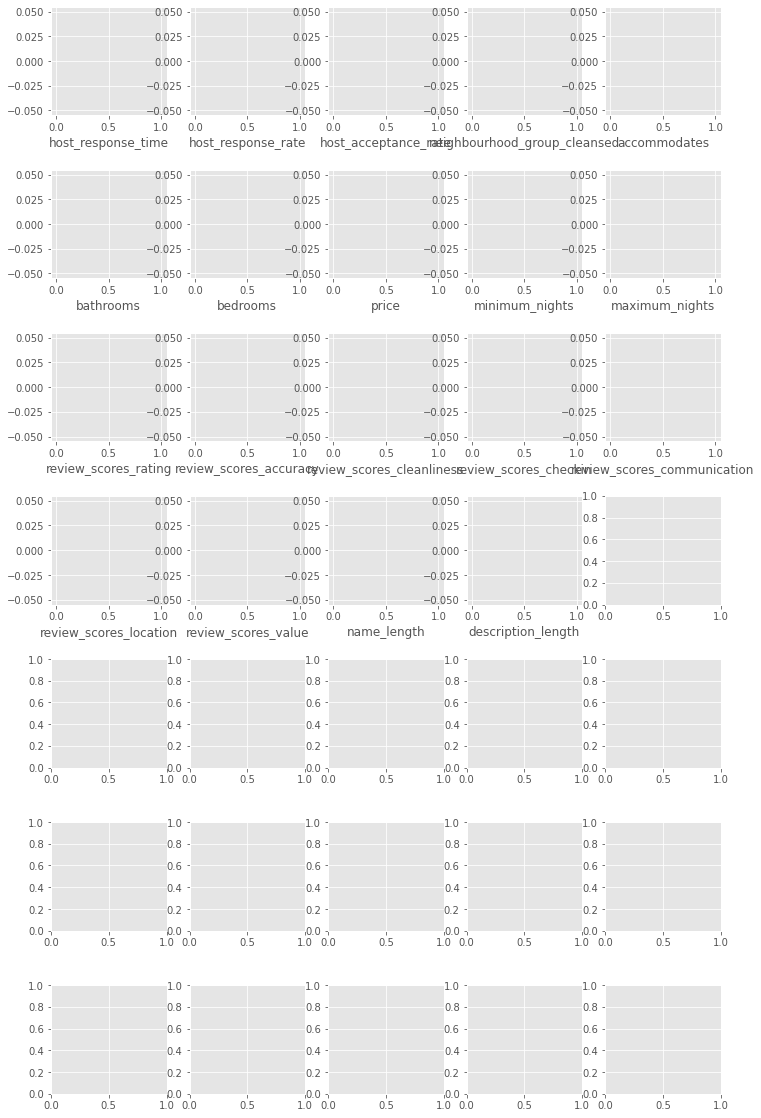

In [ ]:
#Let's look at some distributions
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numdf = ld.select_dtypes(include=numerics)
numdf = numdf.dropna(axis=0, how='any')
numdf_variables = list(numdf)

#Set the number of graphs in the facet chart
graphs = len(numdf_variables)-1

#create a list of positions for the chart
position = []
for i in range(7):
    for j in range(5):
        b = i,j
        position.append(b)

#Create base of subplot chart.. rows x columbs = graphs
fig, axes = plt.subplots(nrows=7, ncols=5, sharey=False, sharex=False, figsize=(12,20))
fig.subplots_adjust(hspace=.5)

#Fill in base with graphs based off of position
for i in range(graphs):
    sns.distplot(numdf[numdf_variables[i]], ax=axes[position[i]], kde=False)

review_scores_rating            1.000000
review_scores_value             0.746591
review_scores_accuracy          0.726856
review_scores_cleanliness       0.707958
review_scores_communication     0.633257
review_scores_checkin           0.585712
review_scores_location          0.439580
amenities_length                0.110106
host_response_rate              0.027078
bedrooms                        0.010664
host_response_time              0.009714
price                           0.006922
description_length              0.005660
minimum_nights                 -0.001844
name_length                    -0.004920
accommodates                   -0.018673
host_acceptance_rate           -0.042961
maximum_nights                 -0.048207
neighbourhood_group_cleansed         NaN
bathrooms                            NaN
Name: review_scores_rating, dtype: float64

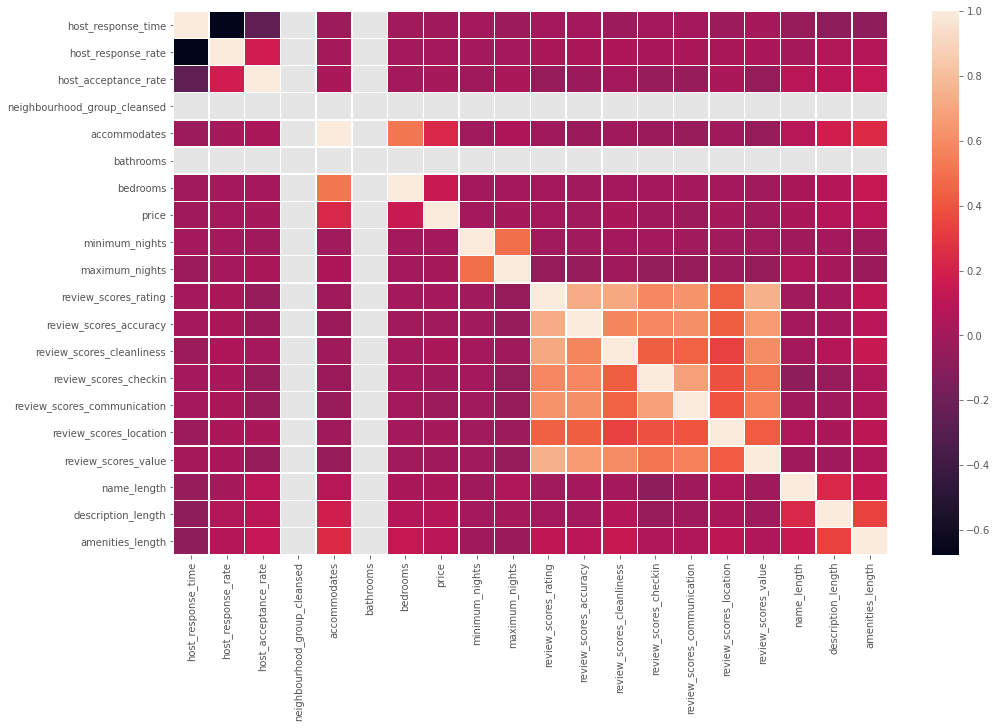

In [ ]:
#Correlation Matrix
fig, ax = plt.subplots(figsize=(16,10))
corr = ld.corr()
corr = (corr)
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, linewidths=.5, ax=ax)
corr['review_scores_rating'].sort_values(ascending=False)

In [ ]:
model_data = ld.loc[:,('host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'neighbourhood_group_cleansed',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'price',
 'minimum_nights',
 'maximum_nights',
 'review_scores_rating',
 'name_length',
 'description_length',
 'amenities_length')]

In [ ]:
ld.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50042 entries, 0 to 66314
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          50020 non-null  object 
 1   description                   49404 non-null  object 
 2   host_response_time            50042 non-null  float64
 3   host_response_rate            50042 non-null  float64
 4   host_acceptance_rate          50042 non-null  float64
 5   host_is_superhost             50042 non-null  object 
 6   neighbourhood_group_cleansed  0 non-null      float64
 7   property_type                 50042 non-null  object 
 8   room_type                     50042 non-null  object 
 9   accommodates                  50042 non-null  int64  
 10  bathrooms                     0 non-null      float64
 11  bedrooms                      50042 non-null  float64
 12  beds                          50042 non-null  object 
 13  a

In [ ]:
model_data = pd.get_dummies(model_data, columns=['neighbourhood_group_cleansed', 'room_type','property_type','beds'])

KeyError: ignored

In [ ]:
# view summary statistics in numerical variables

print(round(ld.describe(),2))

       host_response_time  ...  amenities_length
count            50042.00  ...          50042.00
mean                 1.75  ...            261.05
std                  0.95  ...            137.33
min                  1.00  ...              2.00
25%                  1.00  ...            149.00
50%                  1.00  ...            247.00
75%                  2.00  ...            350.00
max                  4.00  ...           1001.00

[8 rows x 20 columns]


In [ ]:
X = ld.drop(['review_scores_rating'], axis=1)

y = ld['review_scores_rating']

In [ ]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((40033, 26), (10009, 26))

In [ ]:
# check data types in X_train

X_train.dtypes

name                             object
description                      object
host_response_time              float64
host_response_rate              float64
host_acceptance_rate            float64
host_is_superhost                object
neighbourhood_group_cleansed    float64
property_type                    object
room_type                        object
accommodates                      int64
bathrooms                       float64
bedrooms                        float64
beds                             object
amenities                        object
price                           float64
minimum_nights                    int64
maximum_nights                    int64
review_scores_accuracy          float64
review_scores_cleanliness       float64
review_scores_checkin           float64
review_scores_communication     float64
review_scores_location          float64
review_scores_value             float64
name_length                     float64
description_length              float64
